In [38]:
import numpy as np
import PIL.Image as Im
import matplotlib.pyplot as plt
import math
import scipy as sp
import scipy.signal

In [39]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [40]:
clic = np.array(Im.open("lab6files/clic.tif"))
pattern = clic[32:32+20, 12:12+20]
#pattern_full = np.zero(clic.shape)
fact = 0.99
rescorr = sp.signal.correlate(clic, pattern)

/home/johan/.local/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


Text(0.5, 1.0, 'thres corr')

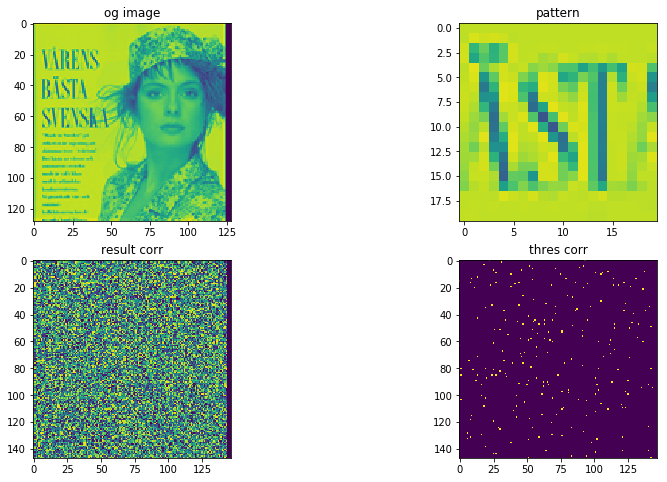

In [41]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.imshow(clic, vmin=0, vmax=255)
plt.title("og image")

plt.subplot(222)
plt.imshow(pattern, vmin=0, vmax=255)
plt.title("pattern")

plt.subplot(223)
plt.imshow(rescorr, vmin=0, vmax=255)
plt.title("result corr")

plt.subplot(224)
plt.imshow(rescorr > (np.max(rescorr[:])*fact))
plt.title("thres corr")

## Question 1
Background matches and gives a high value

Text(0.5, 1.0, 'thres corr')

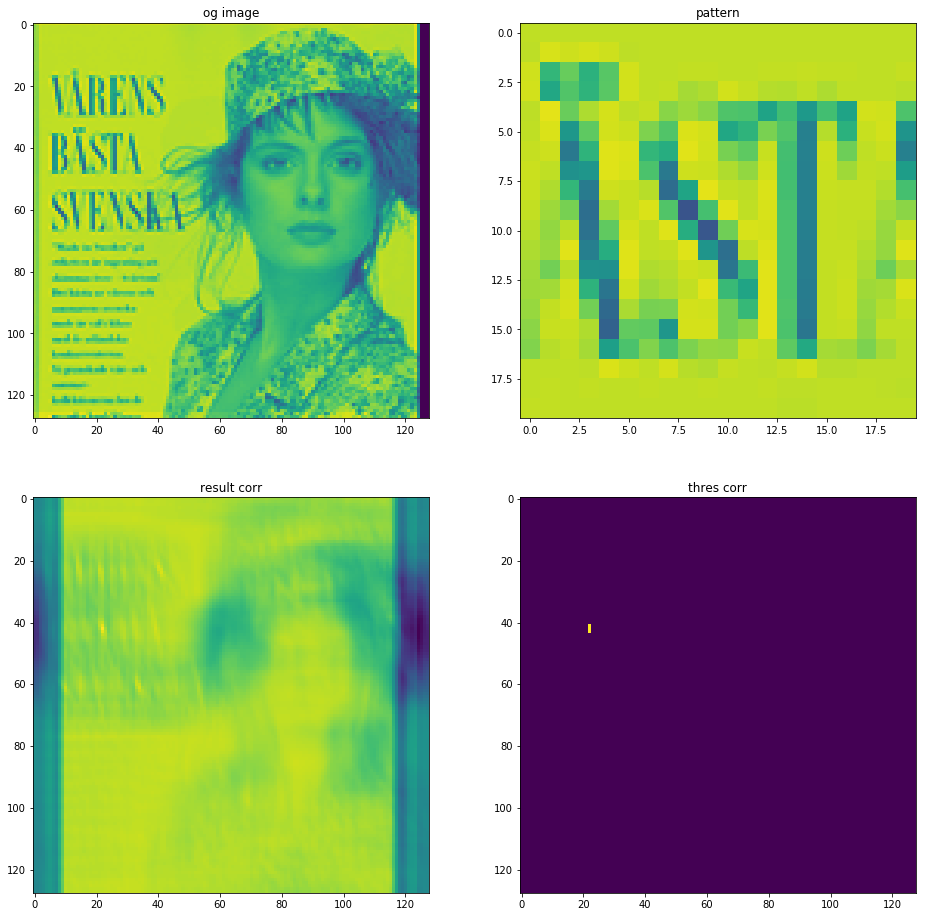

In [53]:
mat_clic = matlab.double(clic.tolist())
mat_pattern = matlab.double(pattern.tolist())

rescorr_norm = eng.corrn(mat_clic, mat_pattern)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(clic, vmin=0, vmax=255)
plt.title("og image")

plt.subplot(222)
plt.imshow(pattern, vmin=0, vmax=255)
plt.title("pattern")

plt.subplot(223)
plt.imshow(rescorr_norm)
plt.title("result corr")

plt.subplot(224)
plt.imshow(rescorr_norm > (np.max(rescorr_norm[:])*fact))
plt.title("thres corr")

## Question 2
Super good result

Text(0.5, 1.0, 'thres corr')

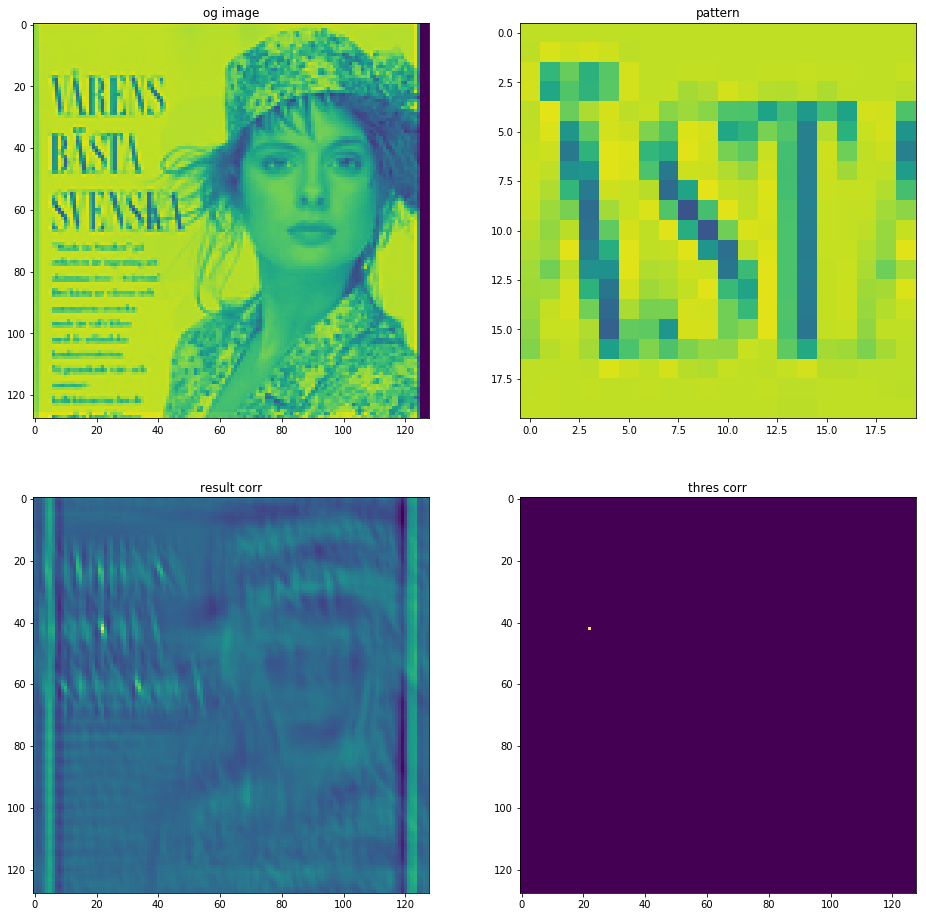

In [54]:
rescorr_dc = eng.corrdc(mat_clic, mat_pattern)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(clic, vmin=0, vmax=255)
plt.title("og image")

plt.subplot(222)
plt.imshow(pattern, vmin=0, vmax=255)
plt.title("pattern")

plt.subplot(223)
plt.imshow(rescorr_dc)
plt.title("result corr")

plt.subplot(224)
plt.imshow(rescorr_dc > (np.max(rescorr_dc[:])*fact))
plt.title("thres corr")

## Question 3
The result is even better, we only get one point instead of several in the normalized version.

Text(0.5, 1.0, 'thres corr')

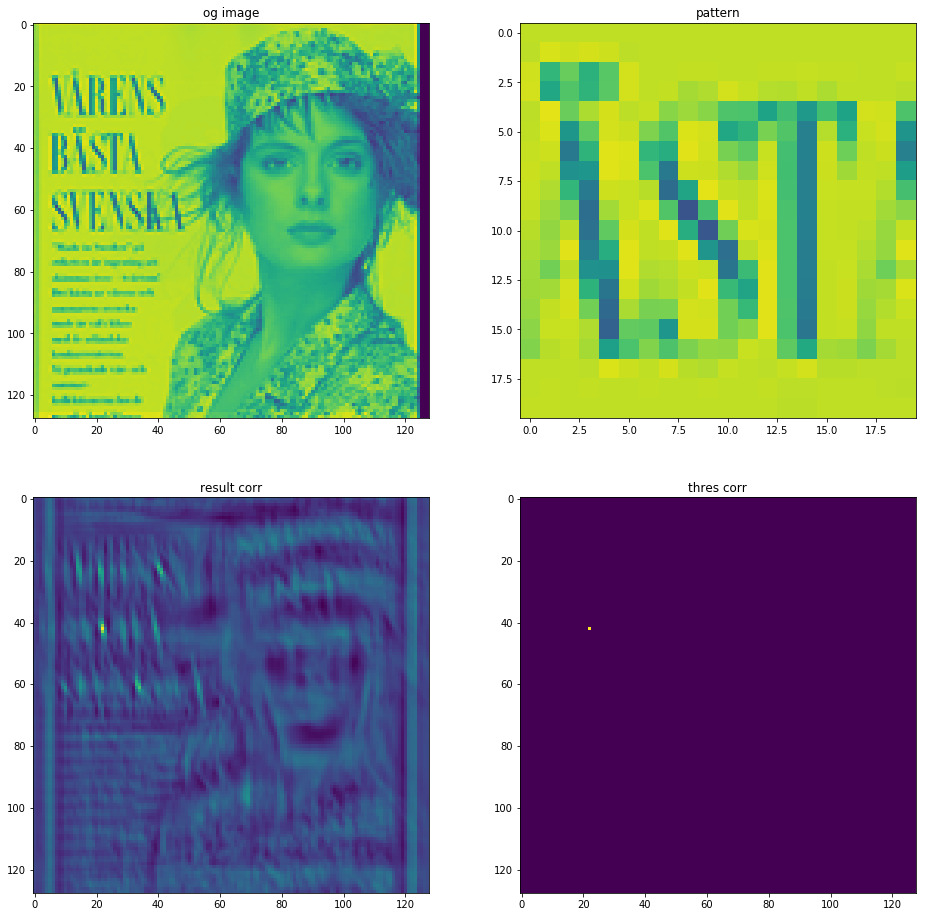

In [55]:
rescorr_c = eng.corrc(mat_clic, mat_pattern)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(clic, vmin=0, vmax=255)
plt.title("og image")

plt.subplot(222)
plt.imshow(pattern, vmin=0, vmax=255)
plt.title("pattern")

plt.subplot(223)
plt.imshow(rescorr_c)
plt.title("result corr")

plt.subplot(224)
plt.imshow(rescorr_c > (np.max(rescorr_c[:])*fact))
plt.title("thres corr")

## Question 4
The result looks similar to the without dc level version.

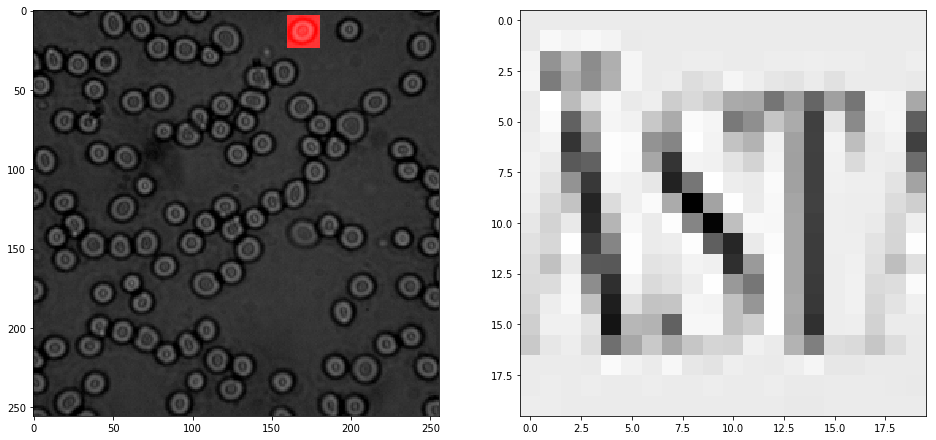

In [44]:
blood = np.array(Im.open("lab6files/blod256.tif"))

blood_pattern = blood[3:23, 160:180]

blood_indication = blood.copy()
blood_indication[3:24, 160:181] = 255
blood_indicated = np.stack((blood_indication, blood, blood), axis=2)
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(blood_indicated, cmap="gray")

plt.subplot(122)
plt.imshow(pattern, cmap="gray")

In [45]:
blood_fact = 0.99

mat_blood = matlab.double(blood.tolist())
mat_blood_pattern = matlab.double(blood_pattern.tolist())

Text(0.5, 1.0, 'thres corr')

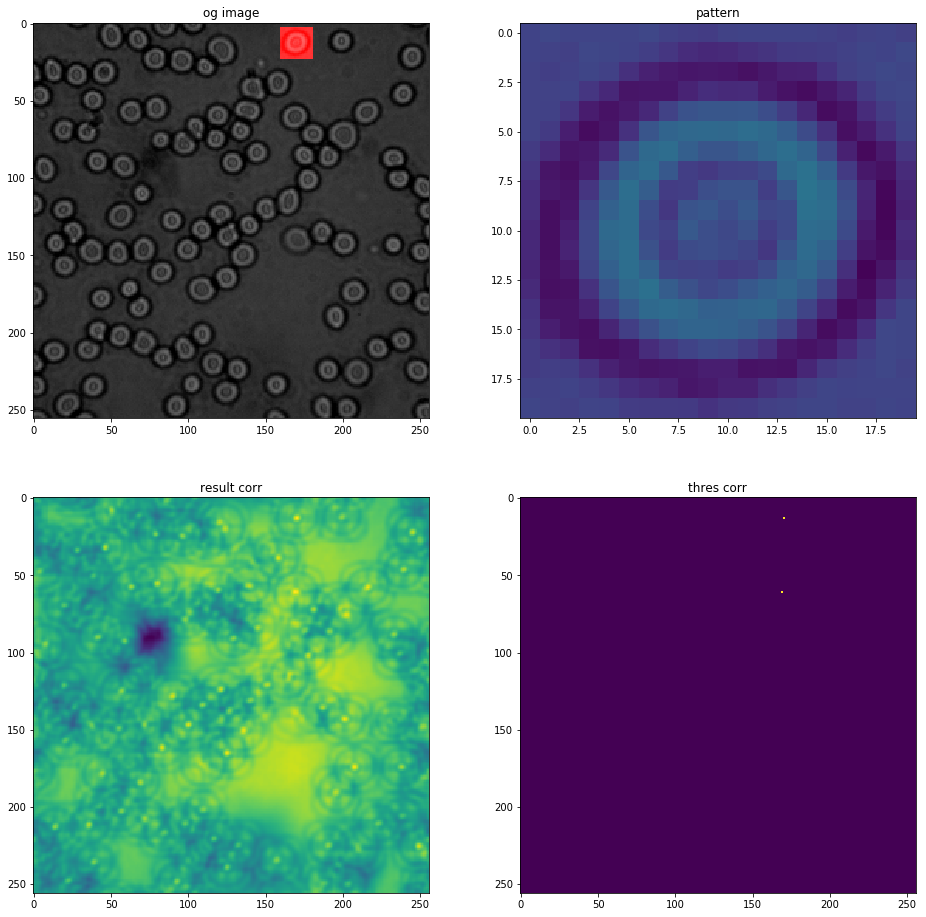

In [46]:
blood_rescorr = eng.corr(mat_blood, mat_blood_pattern)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(blood_indicated, vmin=0, vmax=255)
plt.title("og image")

plt.subplot(222)
plt.imshow(blood_pattern, vmin=0, vmax=255)
plt.title("pattern")

plt.subplot(223)
plt.imshow(blood_rescorr)
plt.title("result corr")

plt.subplot(224)
plt.imshow(blood_rescorr > (np.max(blood_rescorr[:])*blood_fact))
plt.title("thres corr")

Text(0.5, 1.0, 'thres corr')

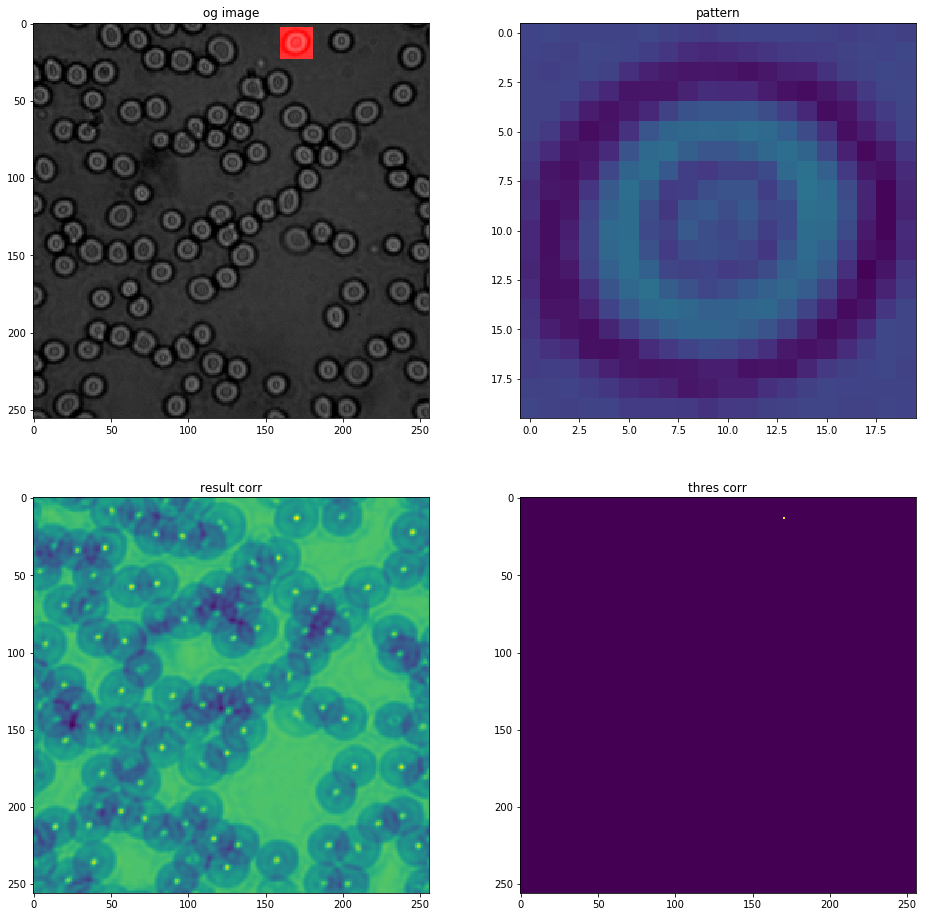

In [94]:
blood_rescorr_norm = eng.corrn(mat_blood, mat_blood_pattern)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(blood_indicated, vmin=0, vmax=255)
plt.title("og image")

plt.subplot(222)
plt.imshow(blood_pattern, vmin=0, vmax=255)
plt.title("pattern")

plt.subplot(223)
plt.imshow(blood_rescorr_norm)
plt.title("result corr")

plt.subplot(224)
plt.imshow(blood_rescorr_norm > (np.max(blood_rescorr_norm[:])*blood_fact))
plt.title("thres corr")

Text(0.5, 1.0, 'thres corr')

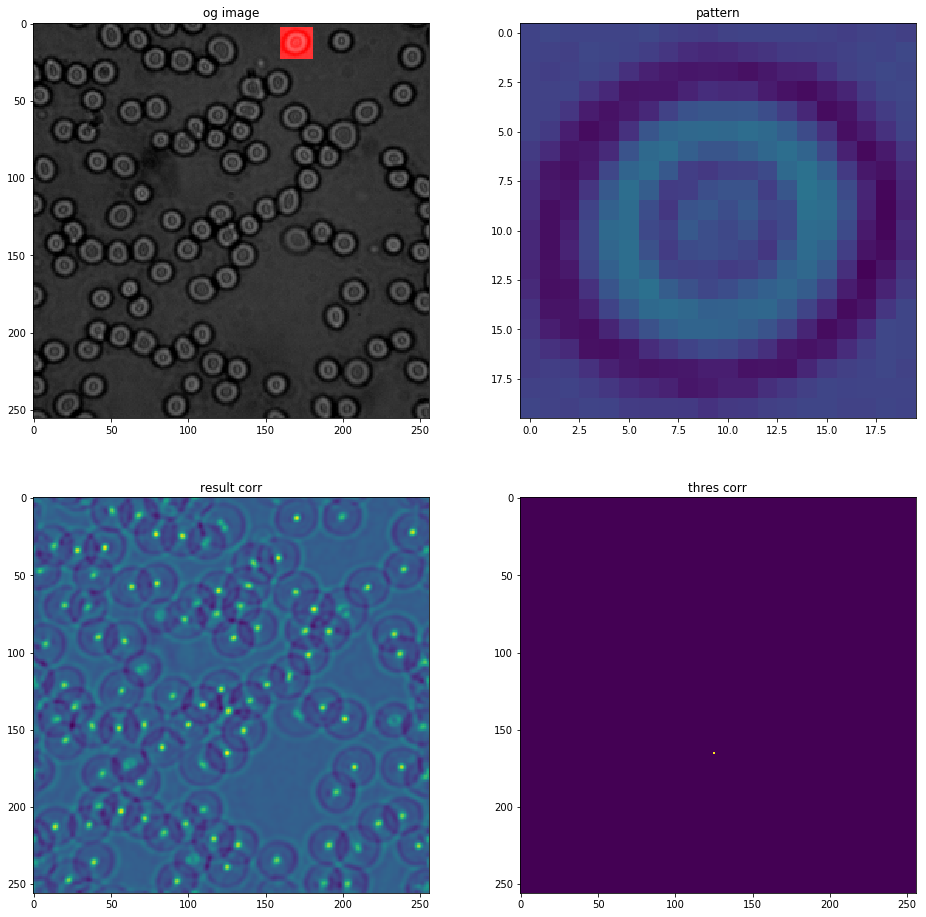

In [95]:
blood_rescorr_dc = eng.corrdc(mat_blood, mat_blood_pattern)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(blood_indicated, vmin=0, vmax=255)
plt.title("og image")

plt.subplot(222)
plt.imshow(blood_pattern, vmin=0, vmax=255)
plt.title("pattern")

plt.subplot(223)
plt.imshow(blood_rescorr_dc)
plt.title("result corr")

plt.subplot(224)
plt.imshow(blood_rescorr_dc > (np.max(blood_rescorr_dc[:])*blood_fact))
plt.title("thres corr")

Text(0.5, 1.0, 'thres corr')

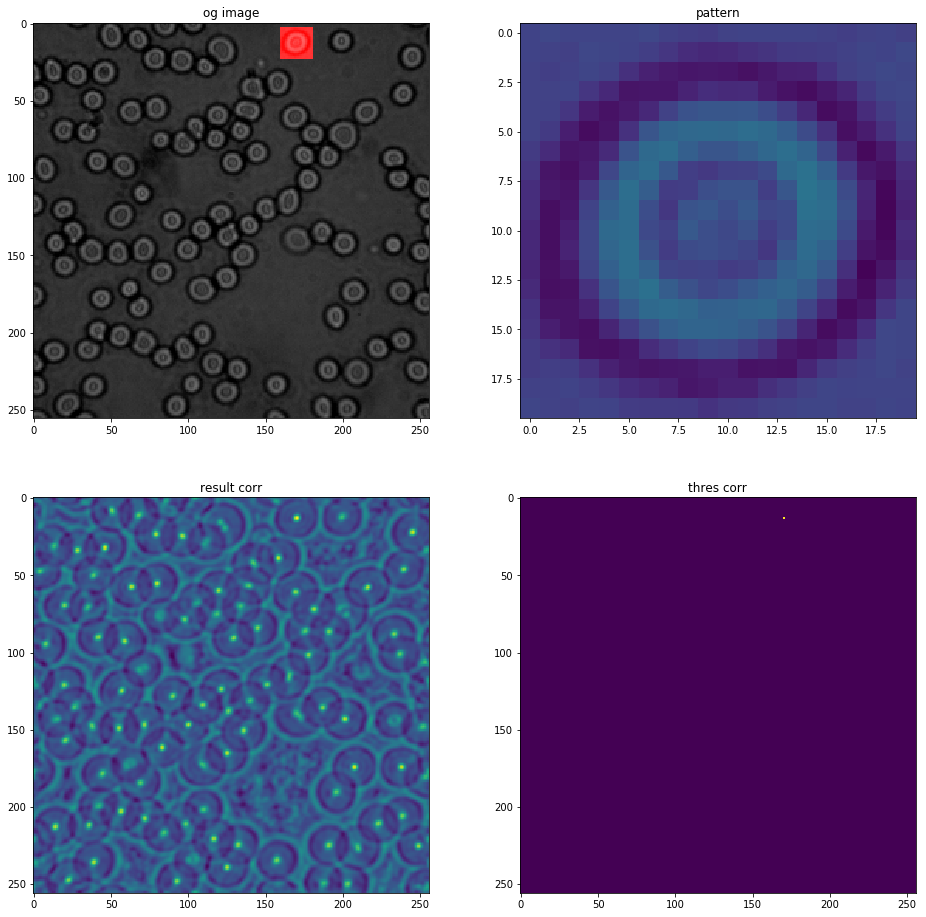

In [96]:
blood_rescorr_c = eng.corrc(mat_blood, mat_blood_pattern)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(blood_indicated, vmin=0, vmax=255)
plt.title("og image")

plt.subplot(222)
plt.imshow(blood_pattern, vmin=0, vmax=255)
plt.title("pattern")

plt.subplot(223)
plt.imshow(blood_rescorr_c)
plt.title("result corr")

plt.subplot(224)
plt.imshow(blood_rescorr_c > (np.max(blood_rescorr_c[:])*blood_fact))
plt.title("thres corr")

## Question 5
Kinda good, threshold = 0.99
* corr finds original plus an extra
* corrn finds original
* corrdc finds the wrong cell
* corrc finds original

In [99]:
nuf = np.array(Im.open("lab6files/nuf0c.tif"), dtype=np.double)
binvect = np.array(eng.())

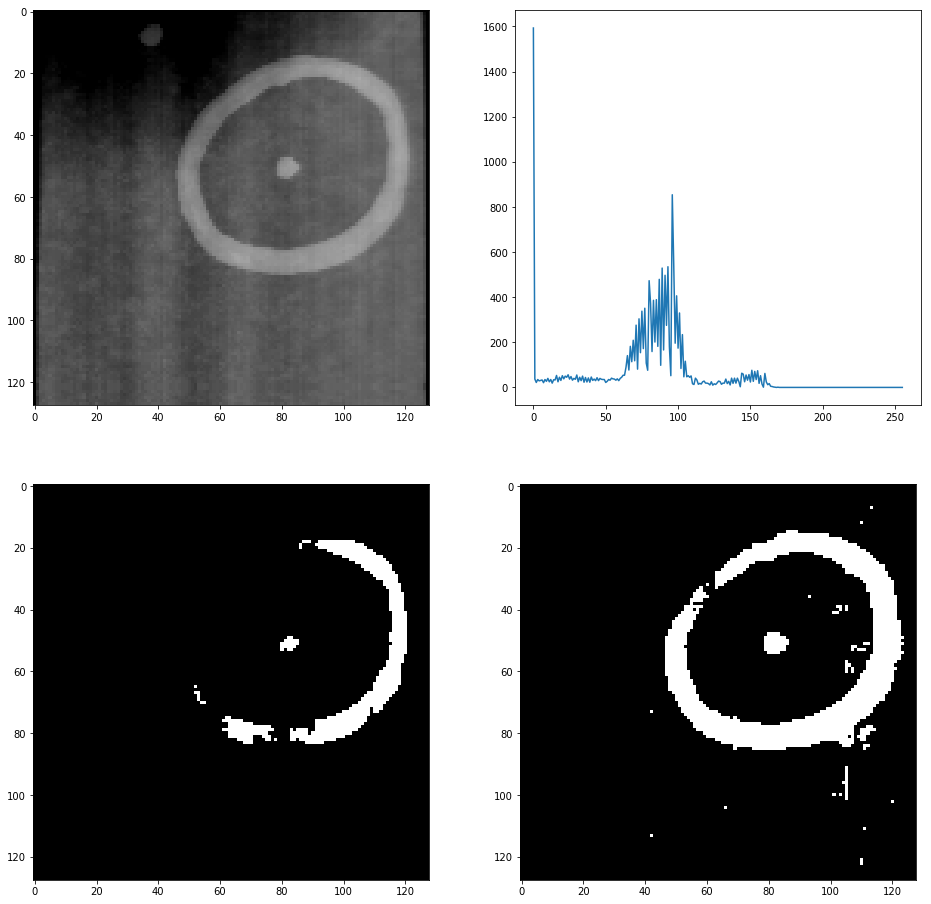

In [132]:
binvect = np.array(range(256))
histo = eng.hist(matlab.double(nuf.flatten().tolist()), matlab.double(binvect.tolist()))

threshold_lower = 106
threshold_higher = 145
nuf_low = nuf>threshold_lower
nuf_high = nuf>threshold_higher

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(nuf, vmin=0, vmax=255, cmap="gray")

plt.subplot(222)
plt.plot(binvect, histo[0])


plt.subplot(223)
plt.imshow(nuf_high, cmap="gray")


plt.subplot(224)
plt.imshow(nuf_low, cmap="gray")

In [55]:
SE8 = np.array(((1,1,1), (1,1,1), (1,1,1)))
SE4 = np.array(((0,1,0), (1,1,1), (0,1,0)))
def dilate_oct(im, iterations):
    im_doct = scipy.ndimage.binary_dilation(im, SE4, iterations=iterations)
    #im_doct = scipy.ndimage.binary_dilation(im_doct, SE8, iterations=iterations)
    return im_doct

def erode_oct(im, iterations):
    im_doct = scipy.ndimage.binary_erosion(im, SE4, iterations=iterations)
    #im_doct = scipy.ndimage.binary_erosion(im_doct, SE8, iterations=iterations)
    return im_doct

In [56]:

def hysteres(b, c):
    e = b.copy()
    images = []
    while True:
        e = b
        d = dilate_oct(b, 1)
        b = d*c
        images.append(b)
        diff = (b^e)
        if not np.sum(diff):
            break
    return images
        


In [57]:
hysts = hysteres(nuf_high, nuf_low)

num = len(hysts)
plt.figure(figsize=(20,4*num/5))

for i, im in enumerate(hysts):
    plt.subplot(int(math.ceil(num/5)), 5, i+1)
    plt.imshow(im, cmap="gray")



NameError: name 'nuf_high' is not defined

121


'\nplt.figure(figsize=(16,16))\nplt.subplot(221)\nplt.imshow(blood_contr, vmin=0, cmap="gray")\n\nplt.subplot(222)\nplt.plot(binvect, histo[0])\n\n\nplt.subplot(223)\nplt.imshow(blood_high, cmap="gray")\n\n\nplt.subplot(224)\nplt.imshow(blood_low, cmap="gray")\n'

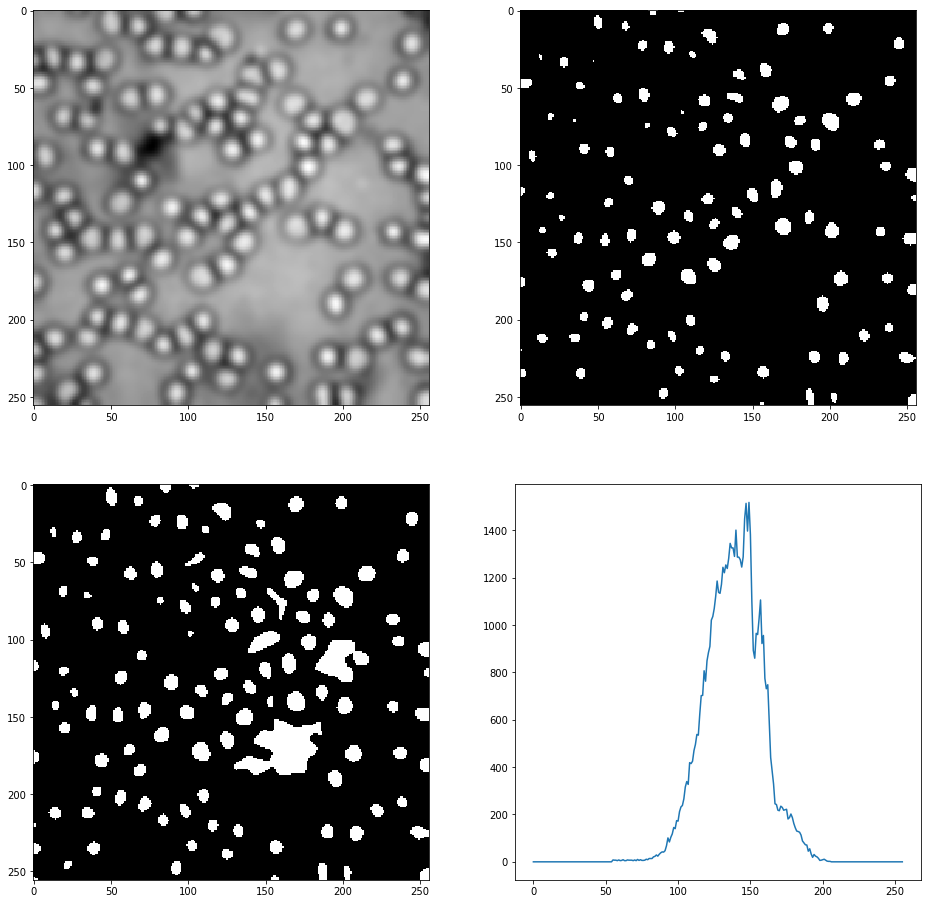

In [58]:
binvect = np.array(range(256))
blood_contr = blood*(255/100)
blood_contr[blood_contr < 0] = 0
blood_contr[blood_contr > 255] = 255
print(np.max(blood))
histo = eng.hist(matlab.double(blood_contr.flatten().tolist()), matlab.double(binvect.tolist()))

threshold_lower = 160
threshold_higher = 190
blood_low = blood_contr>threshold_lower
blood_high = blood_contr>threshold_higher

plt.figure(figsize=(16,16))

#blood_erode = erode_oct(blood_high, 1)


kernel = np.array(((2, 3, 2), (3, 1, 3), (2, 3, 2))) / 21
d = blood
k = 15
for i in range(k):
    d = sp.signal.convolve2d(d, kernel, 'same', "symm")

d_norm = d * 3
d_norm[d_norm > 255] = 255

plt.subplot(221)
plt.imshow(d_norm, cmap="gray")


blood_average_high = d_norm > 167
blood_average_low = d_norm > 160

plt.subplot(222)
plt.imshow(blood_average_high, cmap="gray")

plt.subplot(223)
plt.imshow(blood_average_low, cmap="gray")



plt.subplot(224)
histo_av = eng.hist(matlab.double((d_norm).flatten().tolist()), matlab.double(binvect.tolist()))
plt.plot(binvect, histo_av[0])
#plt.ylim(0, 1000)
#plt.imshow(blood_average_high, cmap="gray")
    
#blood_average_erode = erode_oct(blood_average_high, 1)
##blood_average_closed = dilate_oct(blood_average_erode, 1)
#plt.subplot(224)
#plt.imshow(blood_average_low, cmap="gray")

"""
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(blood_contr, vmin=0, cmap="gray")

plt.subplot(222)
plt.plot(binvect, histo[0])


plt.subplot(223)
plt.imshow(blood_high, cmap="gray")


plt.subplot(224)
plt.imshow(blood_low, cmap="gray")
"""

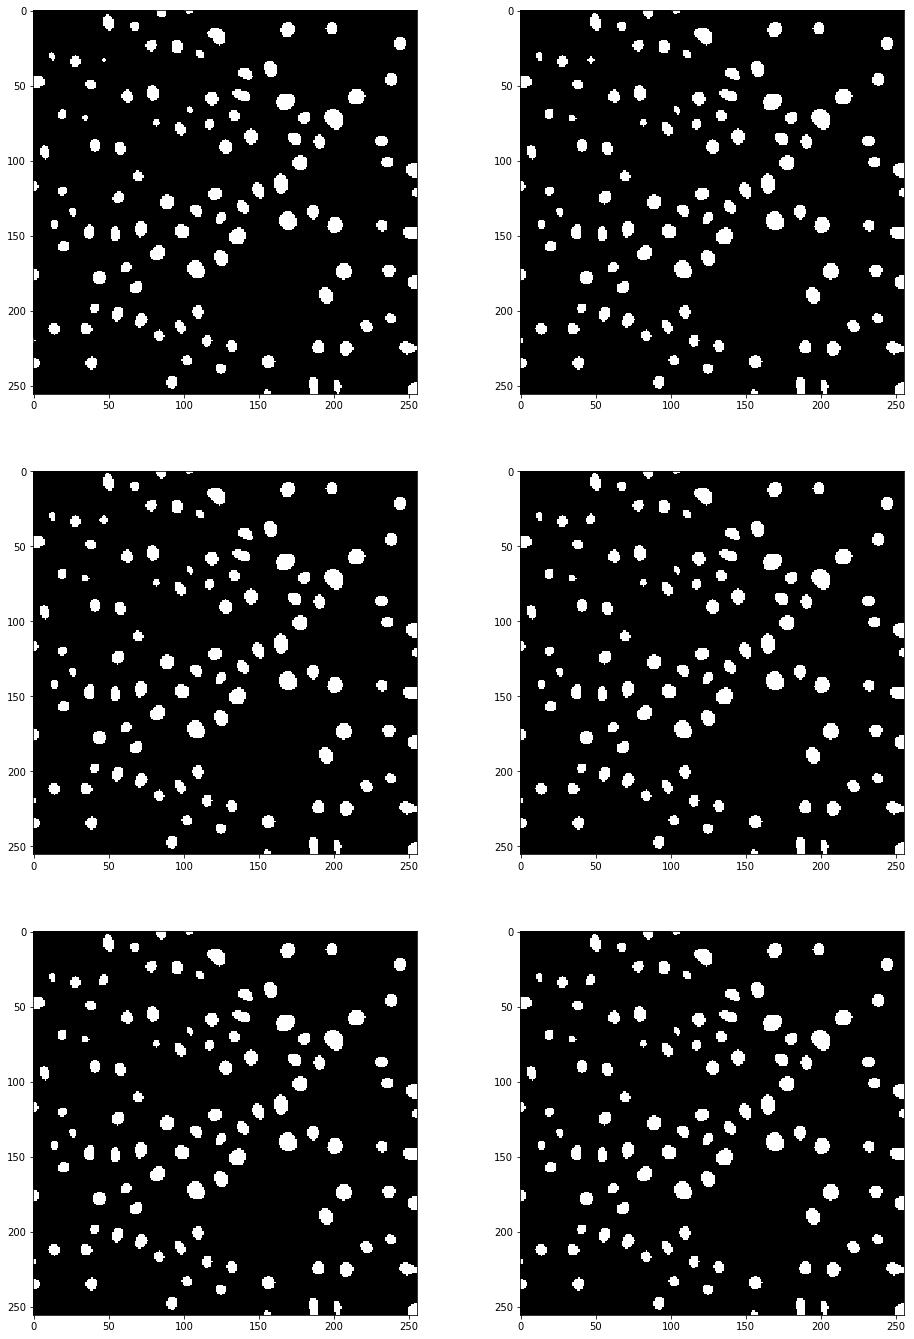

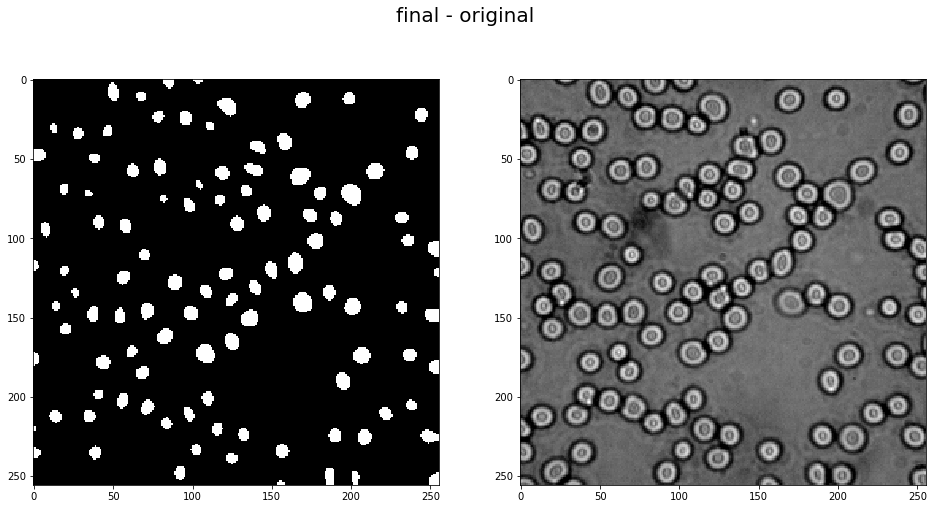

In [59]:
hysts = hysteres(blood_average_high, blood_average_low)

num = len(hysts)
plt.figure(figsize=(16,8*num/2))

for i, im in enumerate(hysts):
    plt.subplot(int(math.ceil(num/2)), 2, i+1)
    plt.imshow(im, cmap="gray")

blood_final = hysts[-1]
fig = plt.figure(figsize=(16,8))
fig.suptitle("final - original", fontsize=20)
plt.subplot(121)
plt.imshow(blood_final, cmap="gray")
plt.subplot(122)
plt.imshow(blood, cmap="gray")

[(1, 57), (2, 21), (3, 28), (4, 6), (5, 28), (6, 45), (7, 45), (8, 20), (9, 26), (10, 32), (11, 30), (12, 42), (13, 23), (14, 41), (15, 46), (16, 16), (17, 59), (18, 36), (19, 50), (20, 48), (21, 31), (22, 65), (23, 36), (24, 65), (25, 51), (26, 57), (27, 56), (28, 53), (29, 53), (30, 40), (31, 31), (32, 54), (33, 38), (34, 69), (35, 60), (36, 44), (37, 67), (38, 79), (39, 17), (40, 38), (41, 33), (42, 75), (43, 50), (44, 56), (45, 50), (46, 70), (47, 46), (48, 36), (49, 13), (50, 17), (51, 113), (52, 51), (53, 52), (54, 23), (55, 42), (56, 63), (57, 35), (58, 101), (59, 61), (60, 79), (61, 45), (62, 38), (63, 66), (64, 44), (65, 42), (66, 98), (67, 71), (68, 55), (69, 60), (70, 73), (71, 66), (72, 60), (73, 79), (74, 12), (75, 99), (76, 116), (77, 124), (78, 77), (79, 61), (80, 80), (81, 53), (82, 60), (83, 59), (84, 57), (85, 56), (86, 80), (87, 135), (88, 49), (89, 89), (90, 35), (91, 92), (92, 70), (93, 94), (94, 52), (95, 51), (96, 44), (97, 45), (98, 58), (99, 57), (100, 38), (10

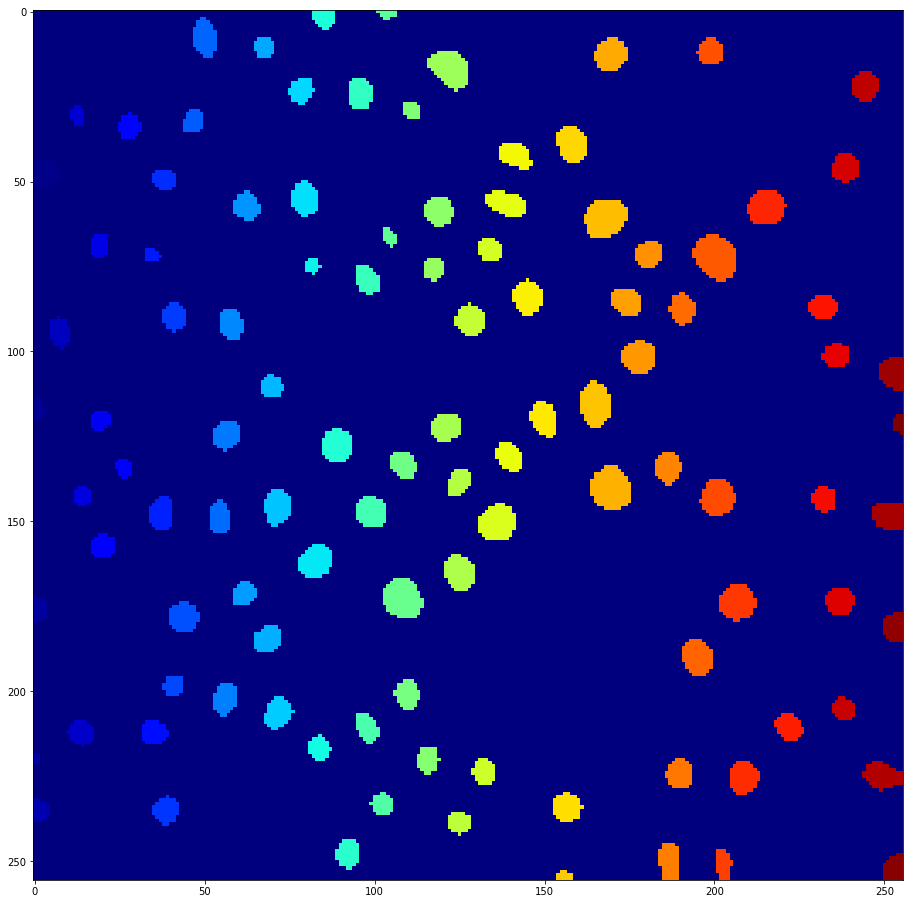

In [60]:
cc = eng.bwconncomp(matlab.double(blood_final.tolist()), float(8))
blood_label = eng.labelmatrix(cc)

plt.figure(figsize=(16,16))
plt.subplot(111)
plt.imshow(blood_label, cmap="jet")

unique, counts = np.unique(np.array(blood_label), return_counts=True)
sizes = list(zip(unique,counts))[1:]
print(sizes)
print(len(sizes))

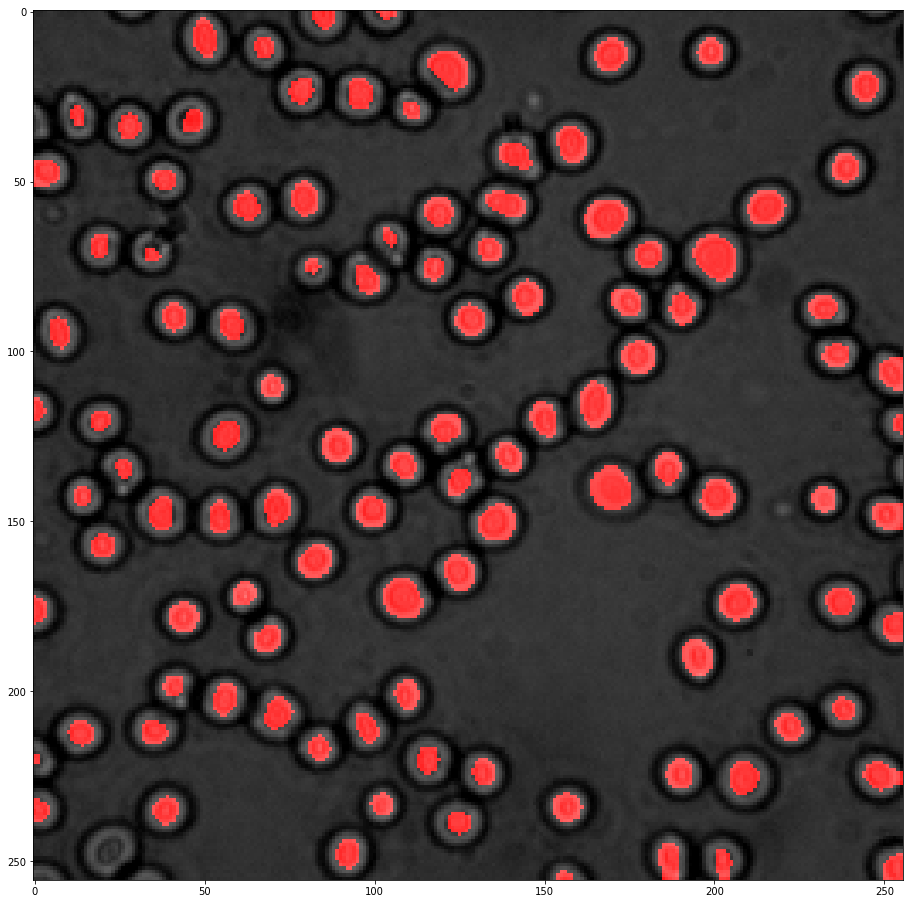

In [61]:
blood_hl = blood.copy()
blood_hl[blood_final] = 255

blood_with_hl = np.stack((blood_hl, blood, blood), axis=2)
plt.figure(figsize=(16,16))
plt.imshow(blood_with_hl)

## Question 6
The program fond 107 cells, it missed one special cell that has tiger colored (black, white, black, white, black) circles, and some very cutoff cells at edges

Text(0.5, 1.0, 'thres corr')

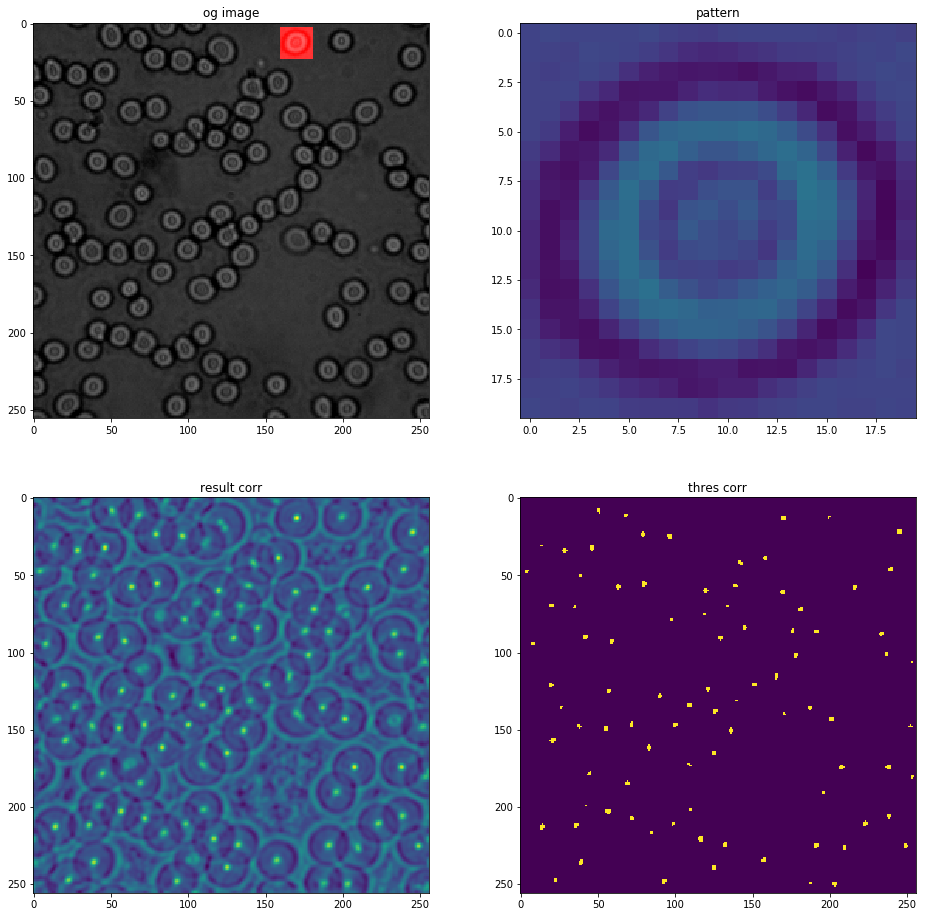

In [62]:
blood_fact = 0.52
blood_rescorr_c = eng.corrc(mat_blood, mat_blood_pattern)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(blood_indicated, vmin=0, vmax=255)
plt.title("og image")

plt.subplot(222)
plt.imshow(blood_pattern, vmin=0, vmax=255)
plt.title("pattern")

plt.subplot(223)
plt.imshow(blood_rescorr_c)
plt.title("result corr")

blood_rescorr_f = blood_rescorr_c > (np.max(blood_rescorr_c[:])*blood_fact)
plt.subplot(224)
plt.imshow(blood_rescorr_f)
plt.title("thres corr")

89


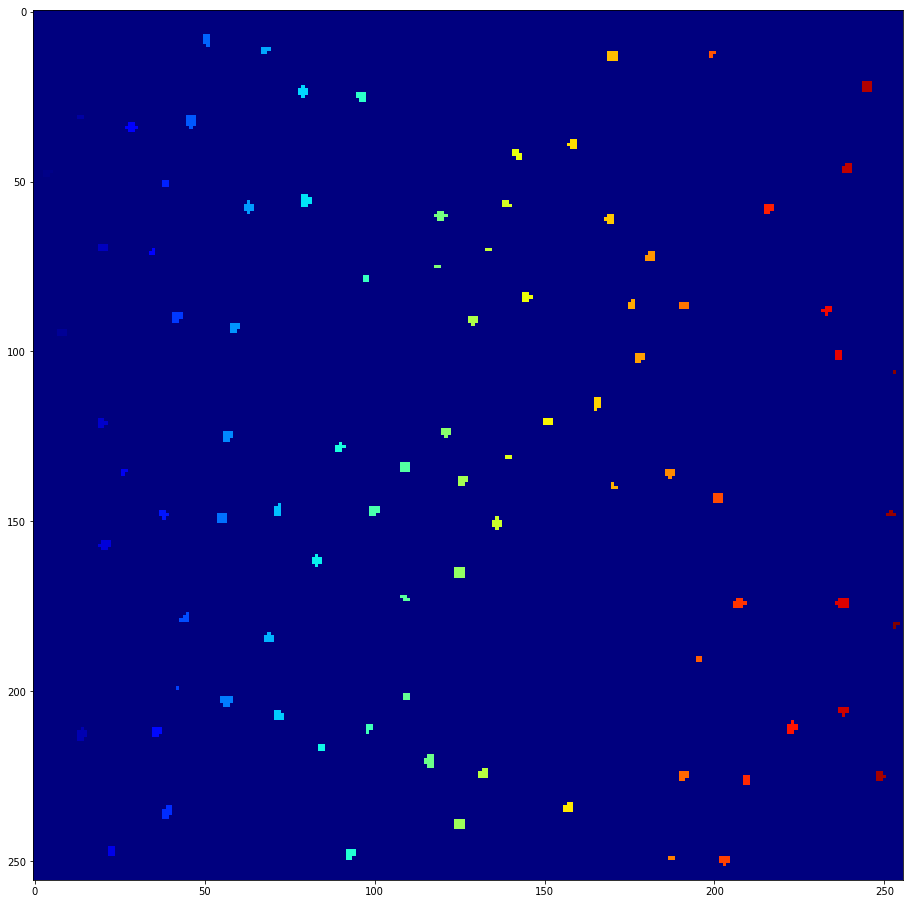

In [63]:
cc = eng.bwconncomp(matlab.double(blood_rescorr_f.tolist()), float(8))
blood_corrc_label = eng.labelmatrix(cc)

plt.figure(figsize=(16,16))
plt.subplot(111)
plt.imshow(blood_corrc_label, cmap="jet")

unique, counts = np.unique(np.array(blood_corrc_label), return_counts=True)
sizes = list(zip(unique,counts))[1:]
print(len(sizes))

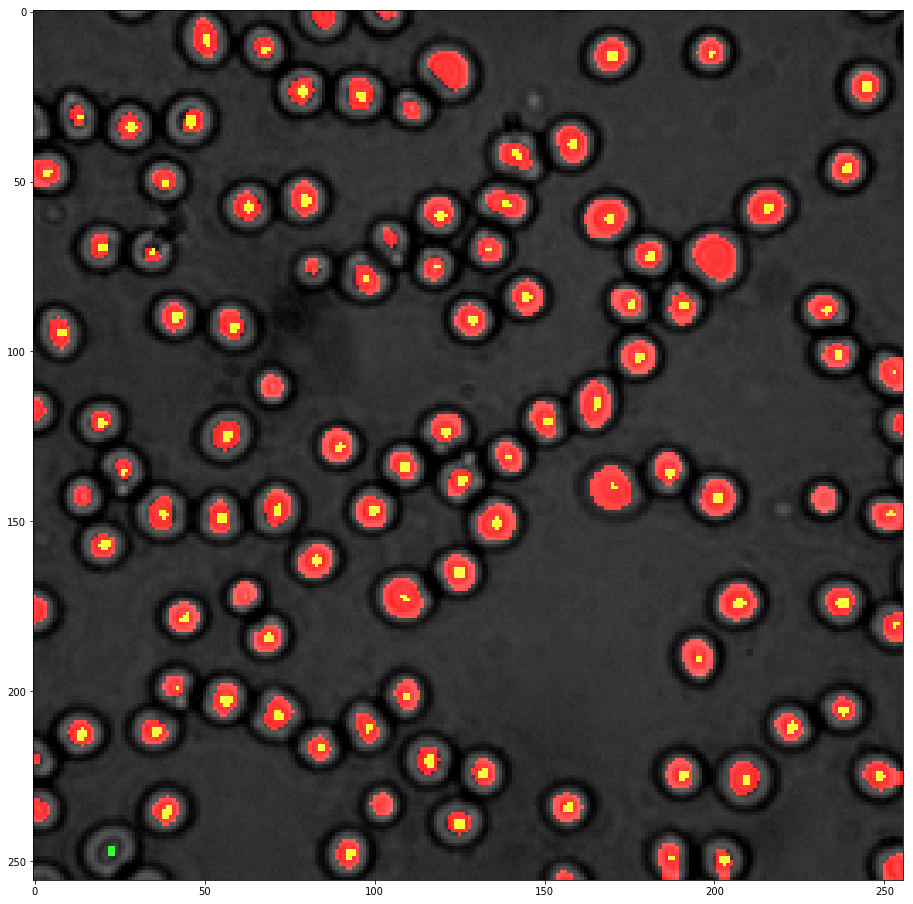

In [64]:
blood_c_hl = blood.copy()
blood_c_hl[blood_rescorr_f] = 255

blood_with_hl = np.stack((blood_hl, blood_c_hl, blood), axis=2)
plt.figure(figsize=(16,16))
plt.imshow(blood_with_hl)

## Question 7
By using correlation, we found 89 cells. See above picture
* Red means that we found them using hysteresis
* Yellow means we found them using hysteresis and correlation.
* The single green cell was only found using correlation.

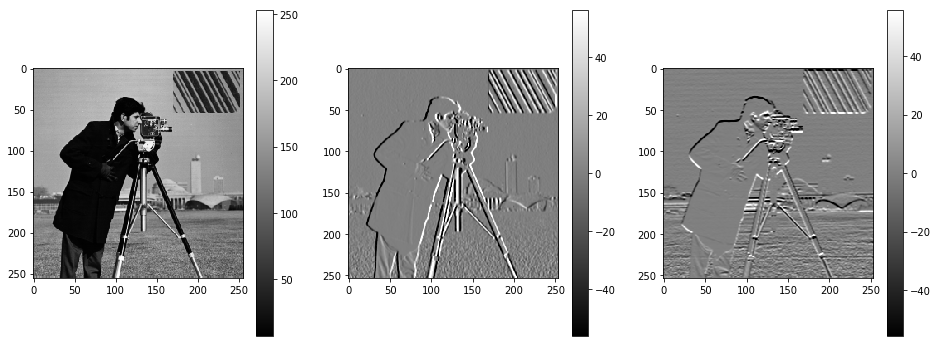

In [27]:
im = np.array(Im.open("lab6files/cmanmod.png"))

plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.imshow(im, cmap="gray")
plt.colorbar()

df = np.array(((1, 0, -1), (2, 0, -2), (1, 0, -1)))/8
fx = sp.signal.convolve2d(im, df, "valid")
maxv = np.max(np.abs(fx))/2
plt.subplot(132)
plt.imshow(fx, vmin=-maxv, vmax=maxv, cmap="gray")
plt.colorbar()

dy = np.transpose(df)
fy = sp.signal.convolve2d(im, dy, "valid")
maxv = np.max(np.abs(fy))/2
plt.subplot(133)
plt.imshow(fy, vmin=-maxv, vmax=maxv, cmap="gray")
plt.colorbar()



## Question 8
The lines for buildings and field are more horizontal.

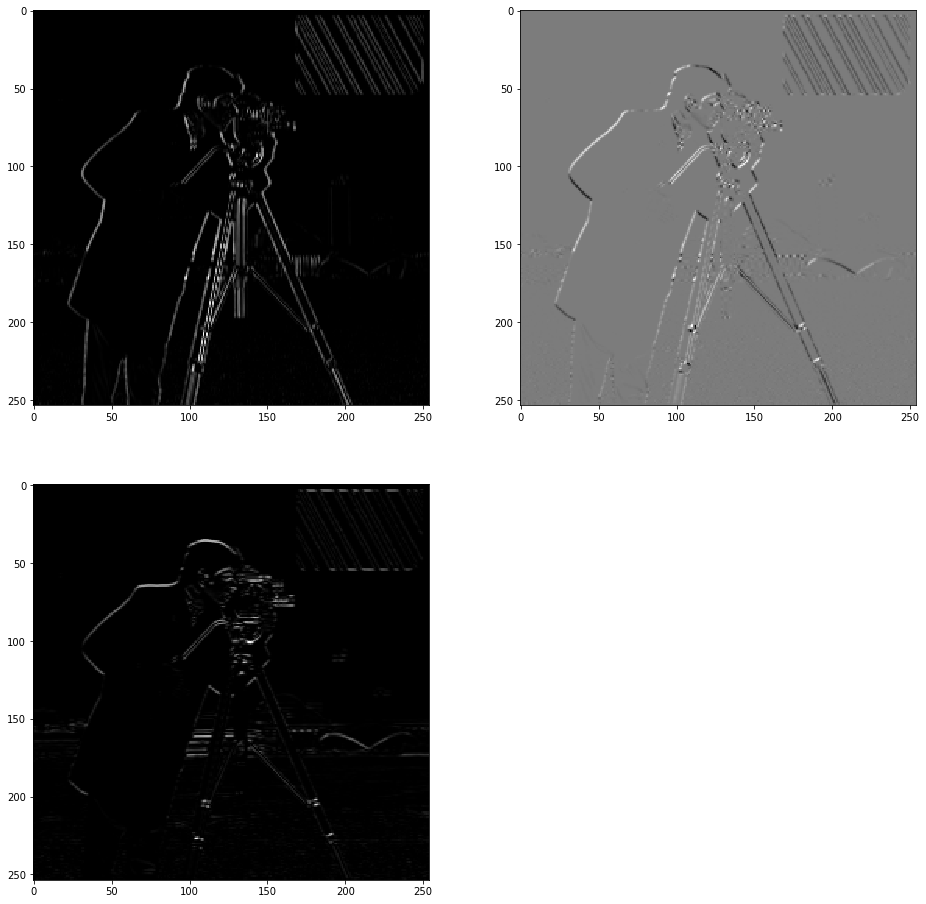

In [28]:
fxx = fx*fx
fxy = fx*fy
fyy = fy*fy

plt.figure(figsize=(16,16))
plt.subplot(221)
maxv = np.max(np.abs(fxx))/2
plt.imshow(fxx, cmap="gray")

plt.subplot(222)
maxv = np.max(np.abs(fxy))/2
plt.imshow(fxy, cmap="gray")

plt.subplot(223)
maxv = np.max(np.abs(fyy))/2
plt.imshow(fyy, cmap="gray")

## Question 9
The pictures look similar. One place where there is a gap is the camera handle and camera stand.

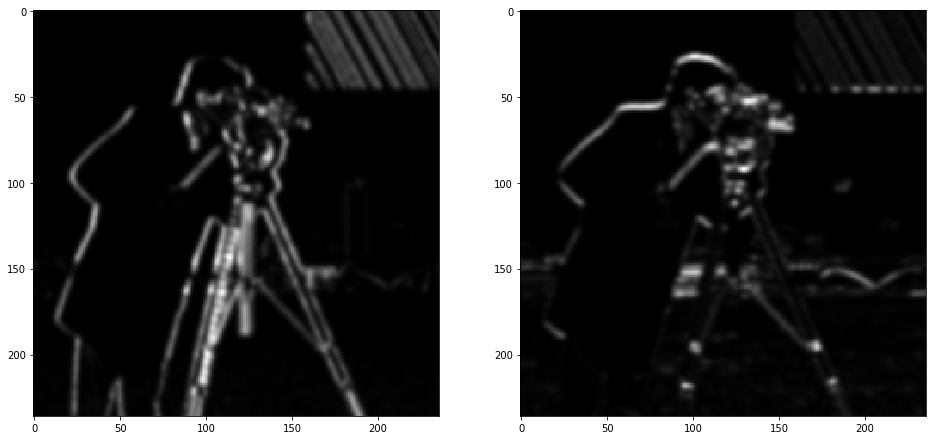

In [29]:
sigma = 1.5
lph = []
for i in range(-9,10):
    lph += [math.exp(-0.5*(i/sigma)**2)]
lph = np.array(lph).reshape(-1,19)
lpv = np.transpose(lph)
#print(lph)
#print(lpv)

t11 = sp.signal.convolve2d(sp.signal.convolve2d(fxx, lph, "valid"), lpv, "valid")
t22 = sp.signal.convolve2d(sp.signal.convolve2d(fyy, lph, "valid"), lpv, "valid")
t12 = sp.signal.convolve2d(sp.signal.convolve2d(fxy, lph, "valid"), lpv, "valid")


plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(t11, cmap="gray")
plt.subplot(122)
plt.imshow(t22, cmap="gray")

## Question 10
$\sigma = 1.5$

In [35]:
import matplotlib.colors
from goptab import c
cmp = matplotlib.colors.ListedColormap(c/255.0)

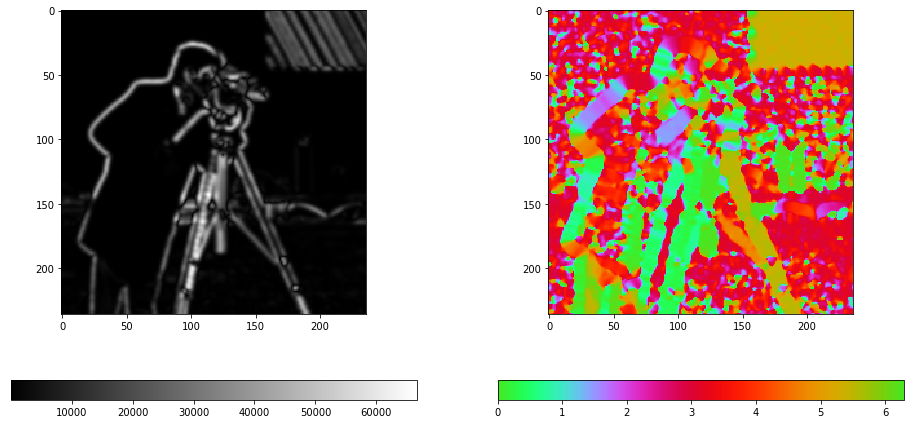

In [36]:
z = t11 - t22 + 2j*t12
z_abs = np.abs(z)
z_arg = np.angle(z)

z_arg[z_arg < 0] += 2*math.pi

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(z_abs, cmap="gray")
plt.colorbar(orientation="horizontal")

plt.subplot(122)
plt.imshow(z_arg, vmin=0, vmax=2*math.pi, cmap=cmp)
plt.colorbar(orientation="horizontal")

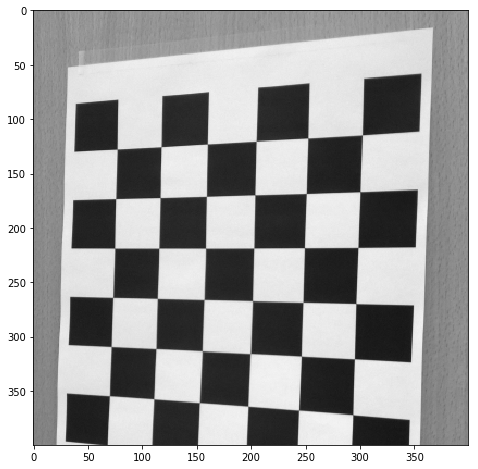

In [12]:
chess = Im.open('lab6files/chess.png').convert('L')
plt.figure(figsize=(16,8))
plt.imshow(chess, cmap="gray")

(400, 400, 2, 2)
(2, 2)
(400, 400, 2, 2)
(array([ 59,  64,  68,  72,  76,  80,  83,  87, 110, 115, 118, 120, 123,
       126, 128, 129, 166, 167, 168, 170, 171, 172, 174, 176, 217, 218,
       219, 219, 219, 219, 219, 219, 265, 265, 265, 267, 267, 268, 270,
       272, 307, 309, 312, 313, 316, 318, 321, 323, 353, 355, 358, 361,
       365, 368, 372, 377, 395]), array([356, 305, 253, 208, 160, 120,  77,  40, 354, 303, 253, 205, 160,
       118,  77,  39, 352, 301, 252, 204, 160, 117,  76,  38, 350,  36,
        75, 116, 158, 203, 249, 299,  35,  74, 114, 157, 201, 248, 297,
       348,  33,  72, 113, 155, 200, 246, 296, 346,  32,  70, 111, 153,
       198, 244, 294, 345,  31]))


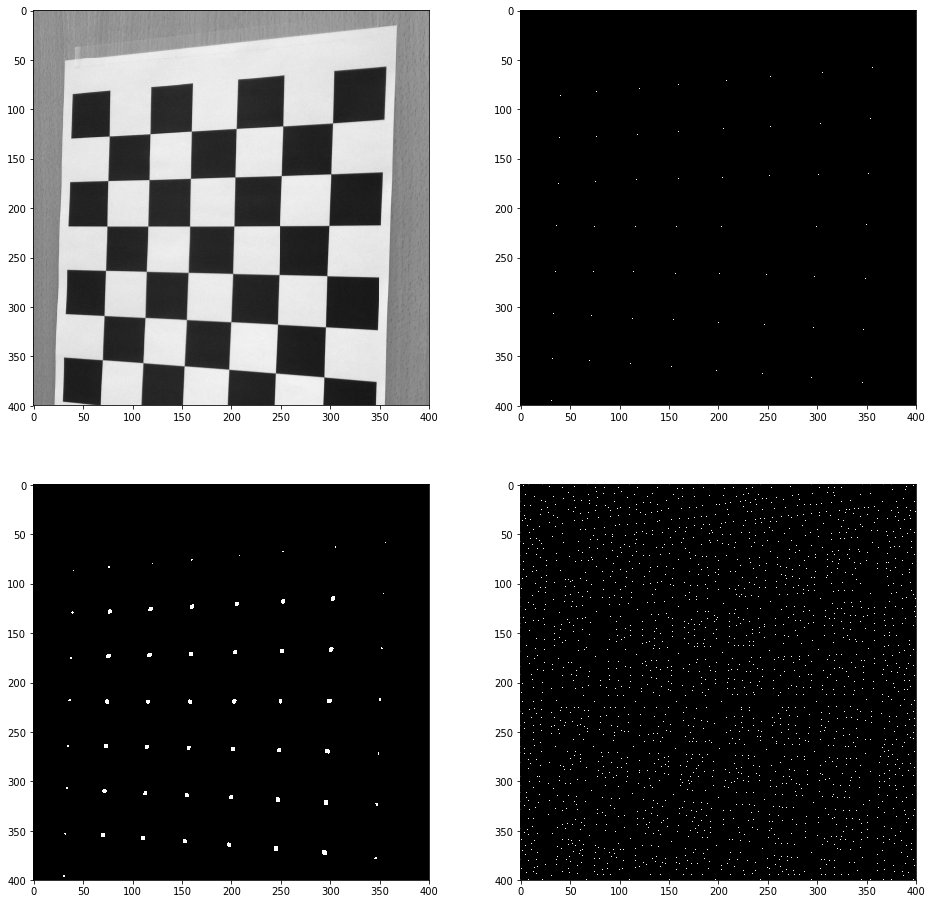

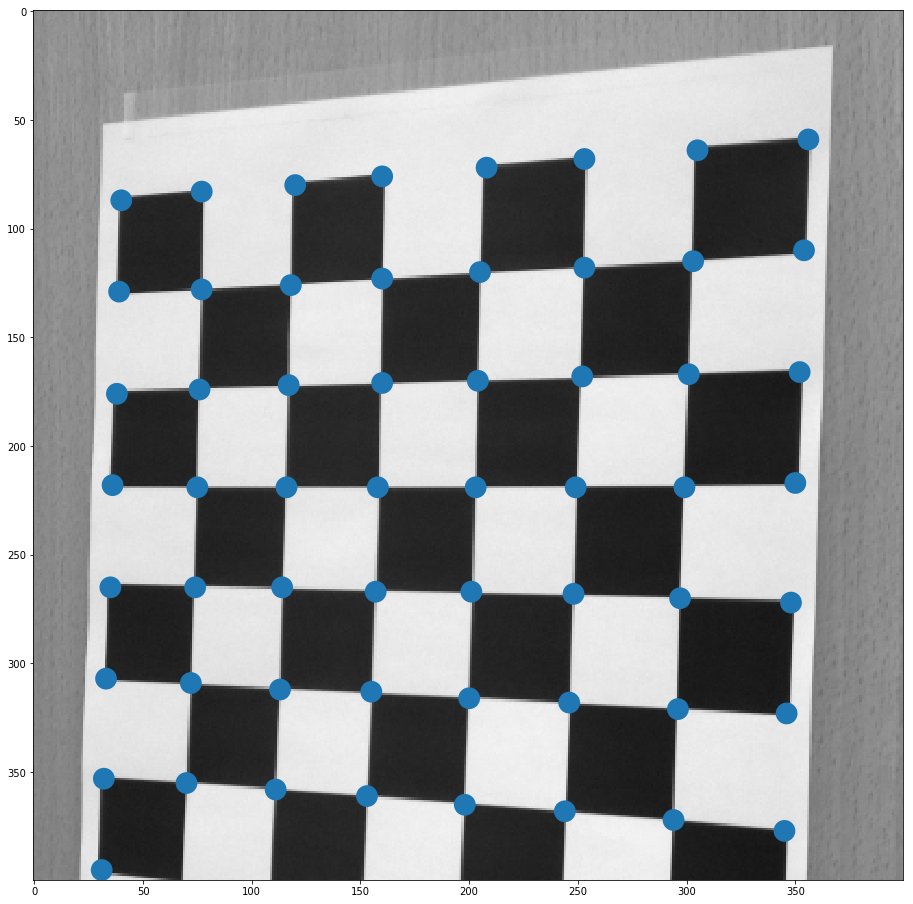

In [18]:
import matplotlib.patches 
cx = sp.signal.convolve2d(chess, df, "same", "wrap")
cy = sp.signal.convolve2d(chess, dy, "same", "wrap")

cxx = cx*cx
cxy = cx*cy
cyy = cy*cy

t11 = sp.signal.convolve2d(sp.signal.convolve2d(cxx, lph, "same", "wrap"), lpv, "same", "wrap")
t22 = sp.signal.convolve2d(sp.signal.convolve2d(cyy, lph, "same", "wrap"), lpv, "same", "wrap")
t12 = sp.signal.convolve2d(sp.signal.convolve2d(cxy, lph, "same", "wrap"), lpv, "same", "wrap")

t = np.zeros((400,400,2,2))
t[:, :, 0, 0] = t11
t[:, :, 0, 1] = t12
t[:, :, 1, 0] = t12
t[:, :, 1, 1] = t22

print(t.shape)

k = 0.05

print(np.trace(t).shape)
print(t.shape)

c = np.linalg.det(t) - k*(np.trace(t, axis1=2, axis2=3))**2


plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(chess)

tresh = 2.8e8
c_t = c > tresh
plt.subplot(223)
plt.imshow(c_t, cmap="gray")

plt.subplot(224)
c_max = eng.imregionalmax(matlab.double(c.tolist()))
plt.imshow(c_max, cmap="gray")

plt.subplot(222)
plt.imshow(c_max * c_t, cmap="gray")
points = np.where(c_max * c_t > 0)
print(points)


fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, aspect="equal")
ax.imshow(chess)
for i in range(len(points[0])):
    c = matplotlib.patches.Circle((points[1][i], points[0][i]))
    ax.add_patch(c)
plt.show()


# 